In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from pathlib import Path

# Set up plotting with a different style
plt.style.use('default')  
sns.set_theme()  
%matplotlib inline

# Import our preprocessing modules
import sys
sys.path.append('../')
try:
    from src.preprocessing.log_preprocessor import LogPreprocessor
    from src.config.preprocessing_config import PreprocessingConfig
    print("Successfully imported preprocessing modules")
except ImportError as e:
    print(f"Error importing preprocessing modules: {e}")

Successfully imported preprocessing modules


In [4]:
def load_logs(dataset_name):
    """Load log data from the specified dataset."""
    base_path = Path('../datasets/raw_drift_dataset')
    log_file = base_path / dataset_name / f'{dataset_name}.log'
    
    try:
        with open(log_file, 'r') as f:
            logs = f.readlines()
        print(f"Successfully loaded {len(logs)} lines from {dataset_name}")
        return logs
    except Exception as e:
        print(f"Error loading {dataset_name}: {str(e)}")
        return None

# Load each dataset
datasets = {}
for name in ['HDFS', 'Apache', 'HealthApp']:
    datasets[name] = load_logs(name)

Successfully loaded 2000 lines from HDFS
Successfully loaded 56482 lines from Apache
Successfully loaded 253395 lines from HealthApp



Statistics for HDFS:
Total logs: 2000
Unique logs: 2000
Average log length: 142.92 characters
Average words per log: 12.44
Percentage of unique logs: 100.00%


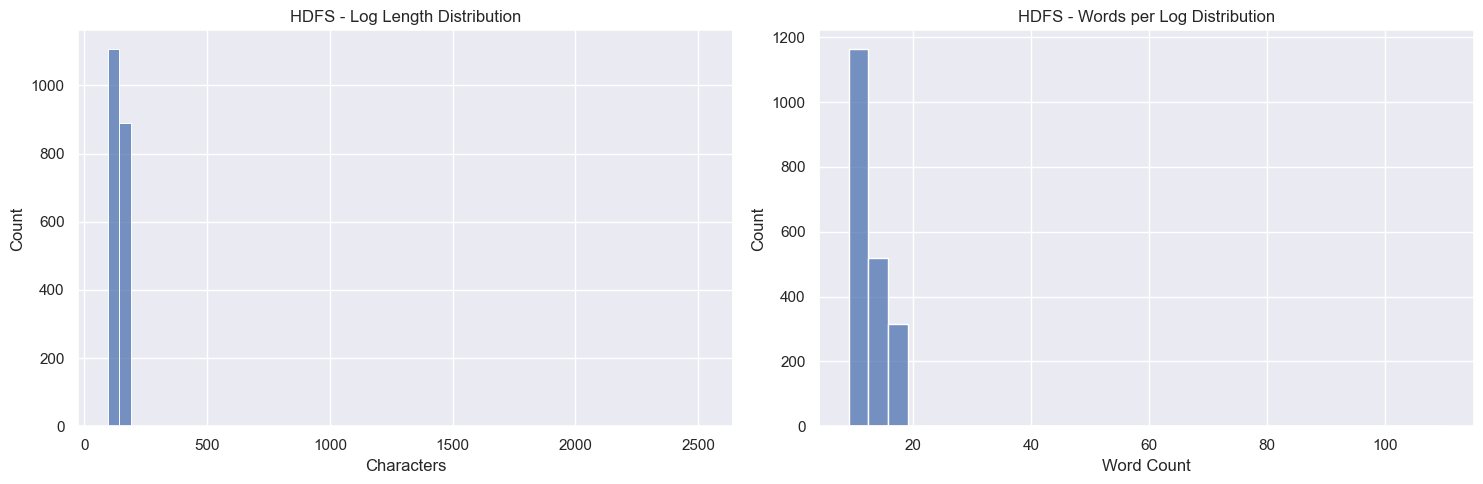


Statistics for Apache:
Total logs: 56482
Unique logs: 28326
Average log length: 90.93 characters
Average words per log: 12.39
Percentage of unique logs: 50.15%


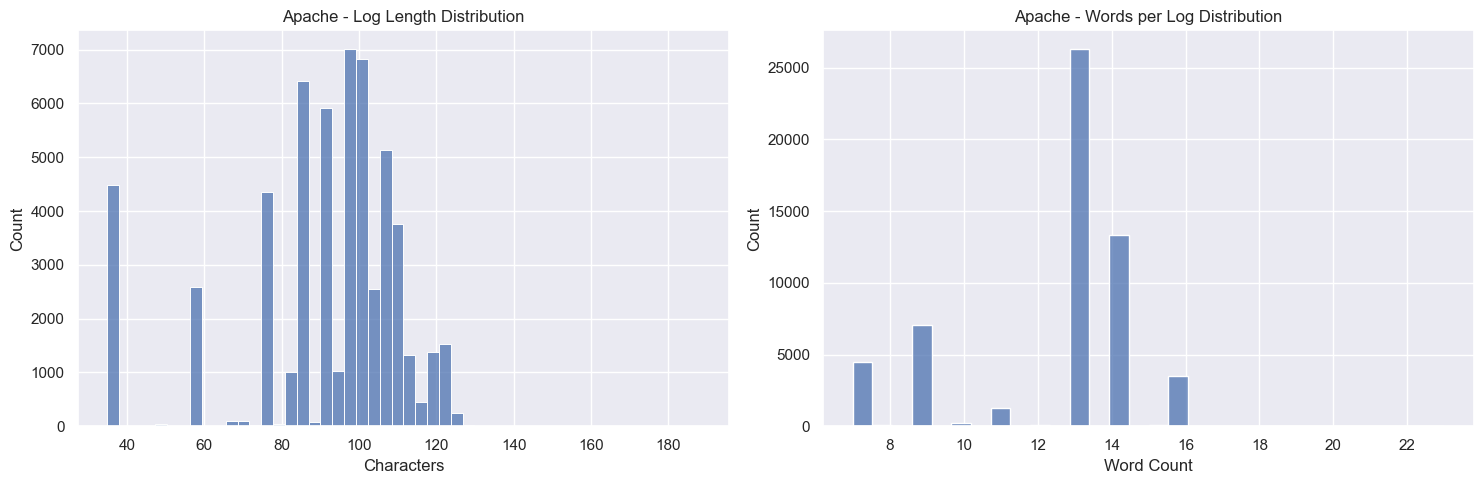


Statistics for HealthApp:
Total logs: 253395
Unique logs: 252979
Average log length: 91.86 characters
Average words per log: 3.28
Percentage of unique logs: 99.84%


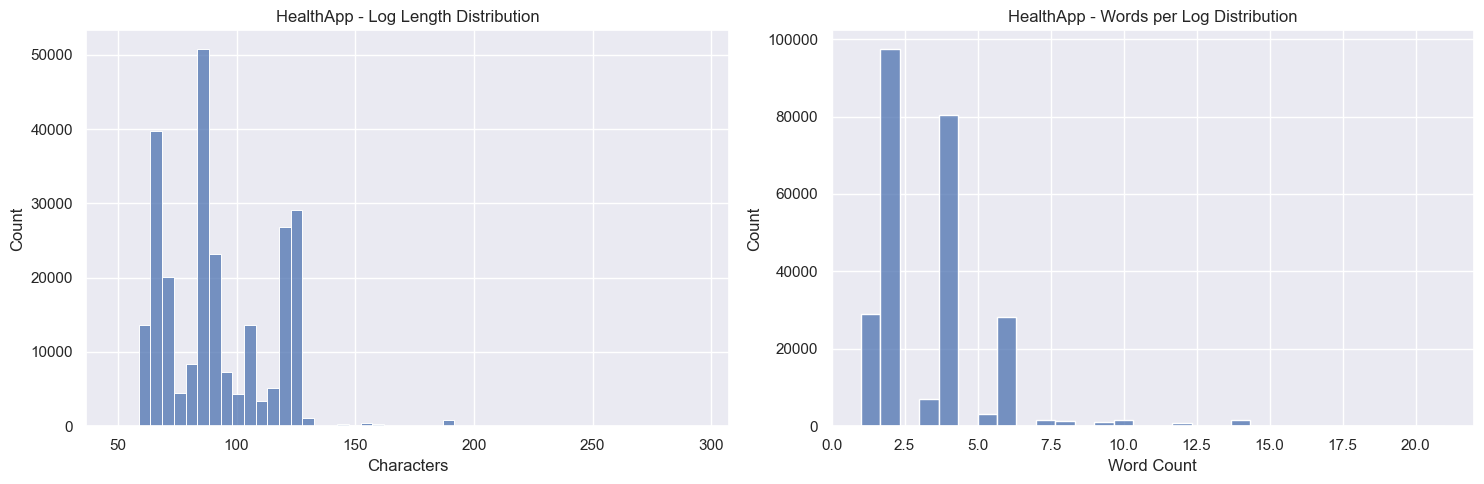

In [6]:
def analyze_basic_stats(logs, name):
    """Calculate basic statistics for a log dataset."""
    if logs is None:
        print(f"No data available for {name}")
        return
    
    # Calculate statistics
    log_lengths = [len(log) for log in logs]
    word_counts = [len(log.split()) for log in logs]
    unique_logs = len(set(logs))
    
    print(f"\nStatistics for {name}:")
    print(f"Total logs: {len(logs)}")
    print(f"Unique logs: {unique_logs}")
    print(f"Average log length: {np.mean(log_lengths):.2f} characters")
    print(f"Average words per log: {np.mean(word_counts):.2f}")
    print(f"Percentage of unique logs: {(unique_logs/len(logs))*100:.2f}%")
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Log length distribution
    sns.histplot(log_lengths, ax=ax1, bins=50)
    ax1.set_title(f'{name} - Log Length Distribution')
    ax1.set_xlabel('Characters')
    
    # Word count distribution
    sns.histplot(word_counts, ax=ax2, bins=30)
    ax2.set_title(f'{name} - Words per Log Distribution')
    ax2.set_xlabel('Word Count')
    
    plt.tight_layout()
    plt.show()

# Analyze each dataset
for name, logs in datasets.items():
    analyze_basic_stats(logs, name)

/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_22116/2830688691.py:43: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  counts = ts_series.resample(window).count()


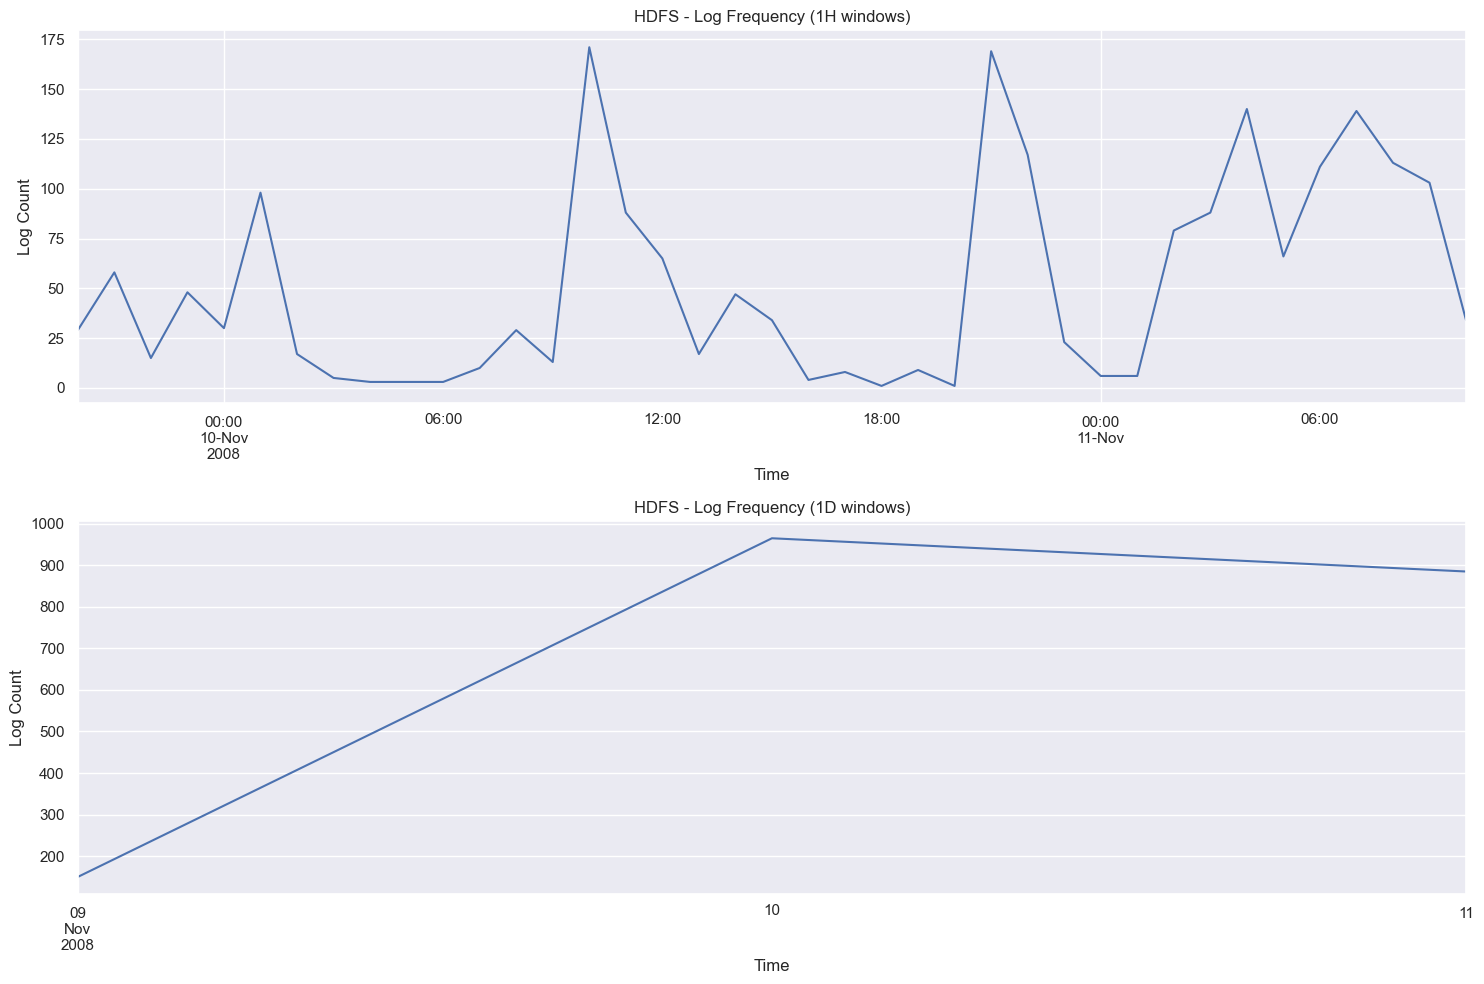


Temporal Statistics for HDFS:
Time span: 1 day, 13:44:02
Average logs per hour: 53.00
Start time: 2008-11-09 20:36:15
End time: 2008-11-11 10:20:17
Error parsing timestamp in Apache: time data 'cript not found or unabl' does not match format '%a %b %d %H:%M:%S %Y'
Error parsing timestamp in Apache: time data 'cript not found or unabl' does not match format '%a %b %d %H:%M:%S %Y'
Error parsing timestamp in Apache: time data 'cript not found or unabl' does not match format '%a %b %d %H:%M:%S %Y'
Error parsing timestamp in Apache: time data 'cript not found or unabl' does not match format '%a %b %d %H:%M:%S %Y'
Error parsing timestamp in Apache: time data 'cript not found or unabl' does not match format '%a %b %d %H:%M:%S %Y'
Error parsing timestamp in Apache: time data 'cript not found or unabl' does not match format '%a %b %d %H:%M:%S %Y'
Error parsing timestamp in Apache: time data 'cript not found or unabl' does not match format '%a %b %d %H:%M:%S %Y'
Error parsing timestamp in Apach

/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_22116/2830688691.py:43: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  counts = ts_series.resample(window).count()


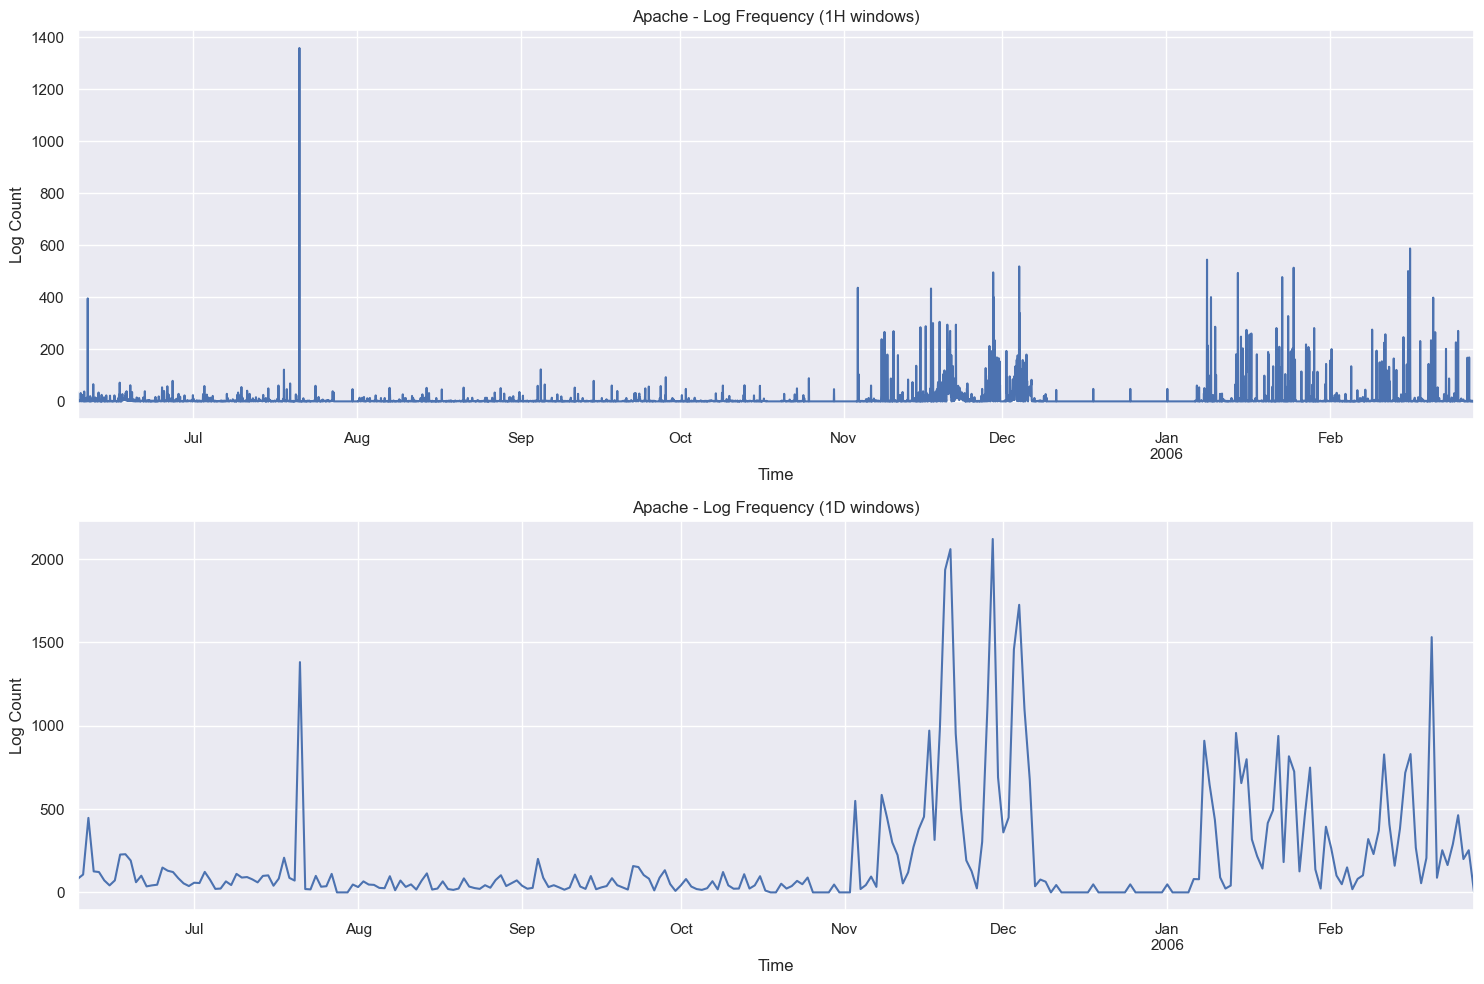


Temporal Statistics for Apache:
Time span: 263 days, 21:41:57
Average logs per hour: 8.21
Start time: 2005-06-09 06:07:04
End time: 2006-02-28 03:49:01
Error parsing timestamp in HealthApp: time data '20171223-22:15:29:6' does not match format '%Y-%m-%d %H:%M:%S'
Error parsing timestamp in HealthApp: time data '20171223-22:15:29:6' does not match format '%Y-%m-%d %H:%M:%S'
Error parsing timestamp in HealthApp: time data '20171223-22:15:29:6' does not match format '%Y-%m-%d %H:%M:%S'
Error parsing timestamp in HealthApp: time data '20171223-22:15:29:6' does not match format '%Y-%m-%d %H:%M:%S'
Error parsing timestamp in HealthApp: time data '20171223-22:15:29:6' does not match format '%Y-%m-%d %H:%M:%S'
Error parsing timestamp in HealthApp: time data '20171223-22:15:29:6' does not match format '%Y-%m-%d %H:%M:%S'
Error parsing timestamp in HealthApp: time data '20171223-22:15:29:6' does not match format '%Y-%m-%d %H:%M:%S'
Error parsing timestamp in HealthApp: time data '20171223-22:15

In [ ]:
def parse_timestamp(log_line, dataset_name):
    """Extract timestamp from a log line based on dataset format."""
    try:
        if dataset_name == 'HDFS':
            # Example: 081109 204655 [main] INFO org.apache.hadoop.hdfs.server.namenode.FSNamesystem
            timestamp_str = log_line[:13]  # Gets "081109 204655"
            return datetime.strptime(timestamp_str, '%y%m%d %H%M%S')
        elif dataset_name == 'Apache':
            # Example: [Fri Feb 11 00:04:03 2015]
            timestamp_str = log_line[1:25]
            return datetime.strptime(timestamp_str, '%a %b %d %H:%M:%S %Y')
        elif dataset_name == 'HealthApp':
            # Example: 2015-10-01 00:00:00
            timestamp_str = log_line[:19]
            return datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
    except Exception as e:
        print(f"Error parsing timestamp in {dataset_name}: {str(e)}")
        return None

def analyze_temporal_patterns(logs, name):
    """Analyze temporal patterns in log data."""
    if logs is None or len(logs) == 0:
        print(f"No data available for {name}")
        return
    
    # Extract timestamps
    timestamps = [parse_timestamp(log, name) for log in logs]
    timestamps = [ts for ts in timestamps if ts is not None]
    
    if not timestamps:
        print(f"No valid timestamps found in {name}")
        return
    
    # Convert to pandas Series for time-based analysis
    ts_series = pd.Series(1, index=timestamps)
    
    # Analyze at different time scales
    windows = ['1H', '1D']
    fig, axes = plt.subplots(len(windows), 1, figsize=(15, 10))
    
    for ax, window in zip(axes, windows):
        # Resample and count
        counts = ts_series.resample(window).count()
        
        # Plot
        counts.plot(ax=ax)
        ax.set_title(f'{name} - Log Frequency ({window} windows)')
        ax.set_xlabel('Time')
        ax.set_ylabel('Log Count')
    
    plt.tight_layout()
    plt.show()
    
    # Print temporal statistics
    time_span = max(timestamps) - min(timestamps)
    avg_logs_per_hour = len(timestamps) / (time_span.total_seconds() / 3600)
    
    print(f"\nTemporal Statistics for {name}:")
    print(f"Time span: {time_span}")
    print(f"Average logs per hour: {avg_logs_per_hour:.2f}")
    print(f"Start time: {min(timestamps)}")
    print(f"End time: {max(timestamps)}")

# Analyze temporal patterns for each dataset
for name, logs in datasets.items():
    analyze_temporal_patterns(logs, name)